In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import nltk

In [3]:
reviews = pd.read_csv('K8 Reviews v0.2.csv')

In [4]:
reviews.head(10)

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...
5,0,Only I'm telling don't buyI'm totally disappoi...
6,1,"Phone is awesome. But while charging, it heats..."
7,0,The battery level has worn down
8,0,It's over hitting problems...and phone hanging...
9,0,A lot of glitches dont buy this thing better g...


## Dataset is scrapped from amazon for lenovo K8 mobile phones
- Review in the form of free text was scrapped and the user rating
- A user rating of 1,2,3 -> sentiment 0 -> negative sentiment
- A user rating of 4 and 5 -> sentiment 1 -> positive sentiment

In [5]:
reviews.shape

(14675, 2)

In [6]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [7]:
reviews.sentiment.value_counts(normalize=True)

0    0.52552
1    0.47448
Name: sentiment, dtype: float64

### Getting insights from the reviews:

    1.use regular expressions
    2.word cloud
    3.Bar graph

## Get the word cloud
    1. combine all the reviews into a single string
    2. instantiate word cloud
    3. generate the word cloud

In [8]:
# quickest way to derive insights
from wordcloud import WordCloud 

In [9]:
reviews_combined = ' '.join(reviews.review.values)

In [10]:
len(reviews_combined)

1674772

In [11]:
reviews_combined[:200]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.'

In [12]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).generate(reviews_combined)

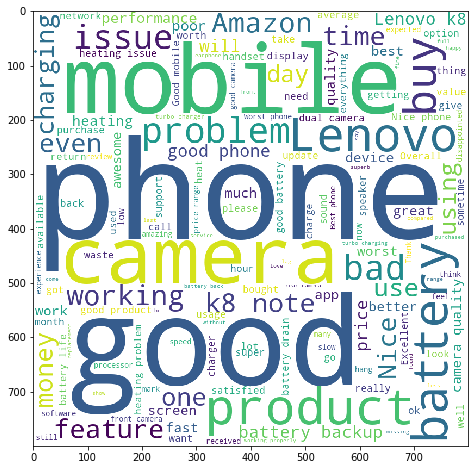

In [13]:
plt.figure(figsize=(8,8))
plt.imshow(word_cloud)
plt.show() #size of the word is directly proportional to freq of the word

- Lenovo, phone, amazon, mobile, K8, note -> these are generic phrase about the phone, domain specific words which freq occur in most of the reviews
- problem, bad, battery, camera, issue, backup -> words about the components of the phone

## Bar graph of top 25 used words
    1. get the words and the frequencies
    2. sort based on frequencies and get top 25 words
    3. plot the bar graph

In [14]:
from nltk.probability import FreqDist
all_terms = reviews_combined.split(' ')
fdist = FreqDist(all_terms)

In [15]:
fdist

FreqDist({'is': 10151, 'the': 5565, 'not': 5162, 'and': 5078, 'phone': 4766, 'to': 4627, 'this': 3833, 'in': 3445, 'I': 3418, 'good': 3348, ...})

In [16]:
# From the dict obtain a data frame of words and freq's
df_dist = pd.DataFrame(fdist.items(),columns=['words','freq'])

In [17]:
df_dist.head()

,words,freq
0,Good,1315
1,but,2222
2,need,196
3,updates,98
4,and,5078


In [18]:
# Top 5 words based on frequency
df_dist.sort_values(by='freq',ascending=False).head(5)

,words,freq
13,is,10151
94,the,5565
41,not,5162
4,and,5078
91,phone,4766


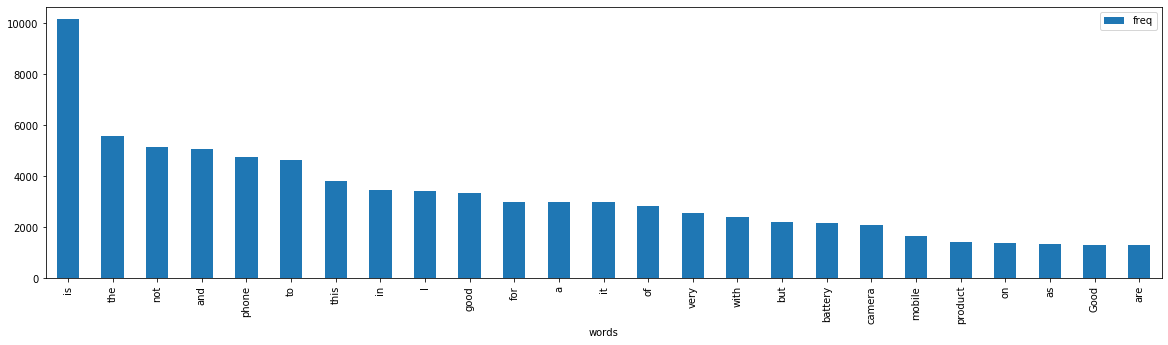

In [19]:
%matplotlib inline
df_dist.sort_values(by='freq',ascending=False).head(25).\
plot.bar(x='words',y='freq',figsize=(20,5))

- These are called as stop words
- Words are in different cases

### Problems with these visuals : Too many words in the corpus of reviews
    1. Text is non uniform case
    2. Punctuations present in the text
    3. There are language connecters in the text - stop words
    4. Words with different forms/tenses - charge, charged, charging

Basic Text processing tasks:
    1. Text cleaning
    2. Get the visuals - word cloud and bar graph or freq graph 

## Text cleaning

In [20]:
from nltk.tokenize import word_tokenize

In [21]:
all_terms = word_tokenize(reviews_combined.lower())

In [22]:
print(all_terms[:20])

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup']


In [23]:
len(set(all_terms))

19159

In [24]:
fdist = FreqDist(all_terms)
fdist

FreqDist({'.': 13530, 'is': 10386, ',': 6890, 'phone': 6565, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5375, 'to': 4697, ...})

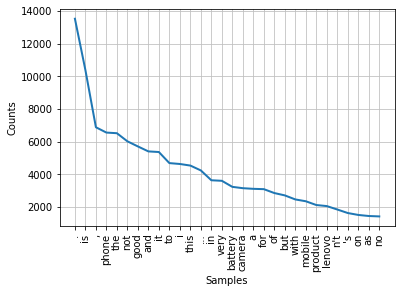

In [25]:
fdist.plot(30)
plt.show()

The head and the tail of the plot consists of:
- Punctuation -> 2 ways to remove punctuation
    - re.sub()
    - prepare a list of punctuations and then put a for loop to remove them
- Stop words of the language
- repeated words specific to the domain

In [26]:
import re
reviews_combined_clean = re.sub('[^\w\s]+','',reviews_combined)
all_terms = word_tokenize(reviews_combined_clean.lower())

In [27]:
len(set(all_terms)) #lesser the words the better for bag of words model

18818

In [28]:
from nltk.tokenize import wordpunct_tokenize

In [29]:
# all_terms is a list in which punctuations are removed using regexp, 
#converted to lower and tokenized
# Now to remove stopwords
from nltk.corpus import stopwords

In [30]:
stop_nltk = stopwords.words('english')

In [31]:
stop_updated = stop_nltk + ['mobile','phone','lenovo','k8','note'] # -> domain specific stopwords

In [32]:
all_terms1 = [term for term in all_terms if term not in stop_updated and len(term) >2]
# len > 2 is remove words like ah,oh etc which does not add any meaning

In [33]:
len(set(all_terms1))

18297

In [34]:
print(all_terms1[:200])

['good', 'need', 'updates', 'improvements', 'worst', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'dischargedthis', 'biggest', 'lie', 'amazon', 'lenove', 'expected', 'making', 'full', 'saying', 'battery', '4000mah', 'booster', 'charger', 'fake', 'takes', 'least', 'hours', 'fully', 'chargeddont', 'know', 'survive', 'making', 'full', 'usplease', 'dont', 'else', 'regret', 'like', 'get', 'cash', 'back', 'already', 'january', 'good', 'worst', 'everthey', 'changed', 'last', 'problem', 'still', 'amazon', 'returning', 'highly', 'disappointing', 'amazon', 'telling', 'dont', 'buyim', 'totally', 'disappointedpoor', 'batterypoor', 'camerawaste', 'money', 'awesome', 'charging', 'heats', 'allotreally', 'genuine', 'reason', 'hate', 'battery', 'level', 'worn', 'hitting', 'problemsand', 'hanging', 'problems', 'noteso', 'service', 'station', 'ahmedabad', 'one', 'years', 'warranty', 'change', 'lot', 'glitches', 'dont', '

## Stemming

In [35]:
from nltk.stem import SnowballStemmer

In [36]:
stemmer_s = SnowballStemmer('english')

In [37]:
stemmed_words = [stemmer_s.stem(word) for word in all_terms1]

In [38]:
print(len(set(stemmed_words)))

15939


## Lemmatization

In [39]:
from nltk.stem import WordNetLemmatizer

In [40]:
lemm = WordNetLemmatizer()

In [41]:
lemma_words_noun = [lemm.lemmatize(word) for word in all_terms1]

In [42]:
print(len(set(lemma_words_noun)))

17707


In [43]:
lemma_words_verb = [lemm.lemmatize(word,pos='v') for word in all_terms1]

In [44]:
print(len(set(lemma_words_verb)))

16877


#### Since stemmer reduces the total number of distinct words in the corpus, we will be using stemming for frequency based analysis

stemmer reduces the number of distinct words in the corpus to a greater extent
lets build a UDF
- input : review
- Tasks : All the above cleaning steps
- Return : string of cleaned review

based on the outcome of this function, you should be able to add a new column in the data frame called as "cleaned_review"

In [45]:
def clean_txt(sent):
    #Stripping white spaces before and after the text
    sent = sent.strip()
    #Replacing multiple spaces with a single space
    result = re.sub('\s+',' ',sent)
    #Replacing the non-alphanumeric and non space chars with nothing
    result1 = re.sub('[^\s\w]+','',result)
    #Normalize case, stemm and remove shorter tokens
    tokens = word_tokenize(result1.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens if term not in stop_updated and len(term)>2]
    #Join all to form a single string which will be returned from the UDF
    res = ' '.join(stemmed)
    return res

In [46]:
reviews['clean_review'] = reviews.review.apply(clean_txt)

In [47]:
reviews.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...


## Word cloud on cleaned dataset

In [48]:
reviews_combined_clean = ' '.join(reviews.clean_review.values)

In [49]:
reviews_combined_clean[:500]

'good need updat improv worst bought ever batteri drain like hell backup hour internet use even put idl get dischargedthi biggest lie amazon lenov expect make full say batteri 4000mah booster charger fake take least hour fulli chargeddont know surviv make full uspleas dont els regret like get cash back alreadi januari good worst everthey chang last problem still amazon return high disappoint amazon tell dont buyim total disappointedpoor batterypoor camerawast money awesom charg heat allotr genuin'

In [50]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).generate_from_text(reviews_combined_clean)

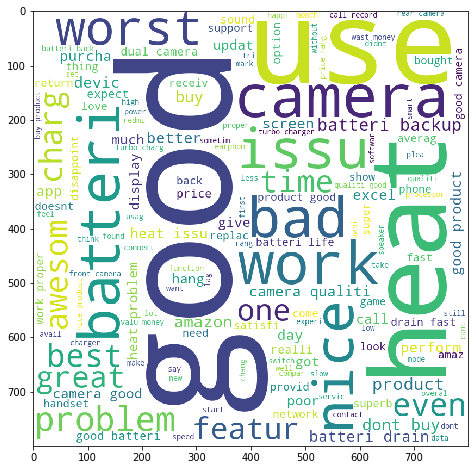

In [51]:
plt.figure(figsize=(8,8))
plt.imshow(word_cloud)
plt.show()

## Bar Graph of top 25 words

In [52]:
from nltk.probability import FreqDist
all_terms = word_tokenize(reviews_combined_clean)
fdist = FreqDist(all_terms)

In [53]:
#From the dict obtain a data frame of words and freq's
df_dist = pd.DataFrame(fdist.items(),columns=['words','freq'])

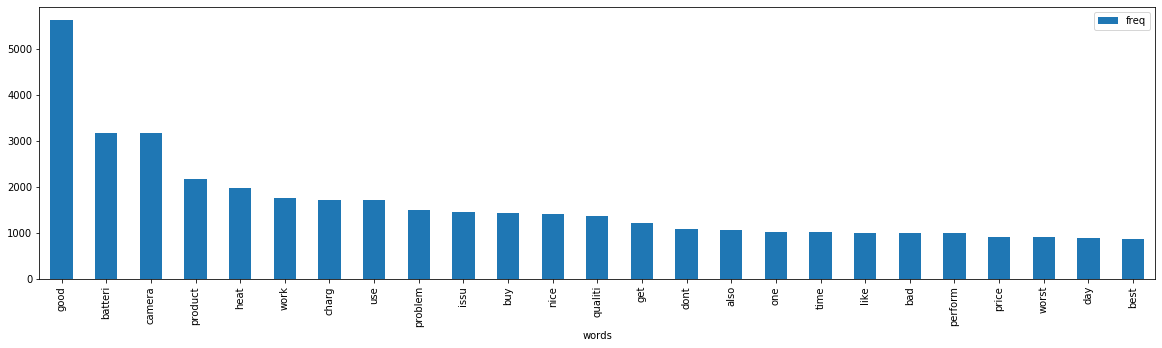

In [54]:
df_dist.sort_values(ascending=False,by='freq').head(25).plot.bar(x='words',y='freq',figsize=(20,5))

## For amazon reviews dataset, obtain word cloud and bar graph for each of the sentiments categories

In [55]:
sentiment_neg = reviews[reviews['sentiment'] == 0]
sentiment_pos = reviews[reviews['sentiment'] == 1]

In [56]:
sentiment_neg.head()

,sentiment,review,clean_review
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...
5,0,Only I'm telling don't buyI'm totally disappoi...,tell dont buyim total disappointedpoor battery...
7,0,The battery level has worn down,batteri level worn
8,0,It's over hitting problems...and phone hanging...,hit problemsand hang problem noteso servic sta...


In [57]:
sentiment_pos.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari
3,1,Good,good
6,1,"Phone is awesome. But while charging, it heats...",awesom charg heat allotr genuin reason hate
11,1,Good phone but charger not working / damage wi...,good charger work damag within month


In [58]:
reviews_combined_clean_pos = ' '.join(sentiment_pos.clean_review.values)
reviews_combined_clean_neg = ' '.join(sentiment_neg.clean_review.values)

In [59]:
word_cloud_neg = WordCloud(width=800,height=800,background_color='white',max_words=150).generate_from_text(reviews_combined_clean_neg)
word_cloud_pos = WordCloud(width=800,height=800,background_color='white',max_words=150).generate_from_text(reviews_combined_clean_pos)

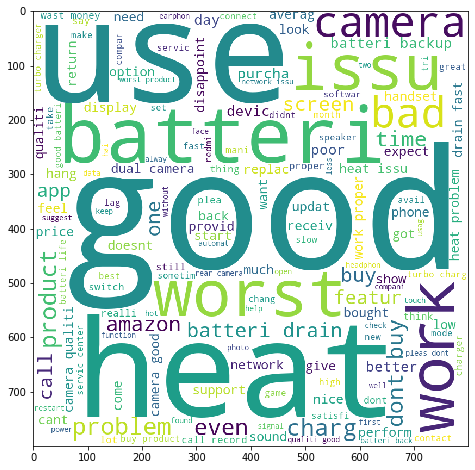

In [60]:
plt.figure(figsize=(8,8))
plt.imshow(word_cloud_neg)
plt.show()

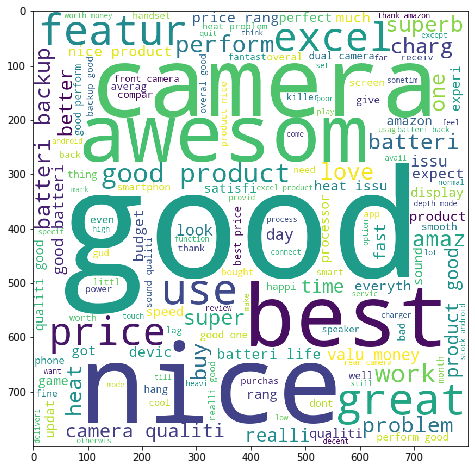

In [61]:
plt.figure(figsize=(8,8))
plt.imshow(word_cloud_pos)
plt.show()

In [62]:
all_terms_neg = word_tokenize(reviews_combined_clean_neg)
fdist = FreqDist(all_terms_neg)

In [63]:
df_dist_neg = pd.DataFrame(fdist.items(),columns=['words','freq'])

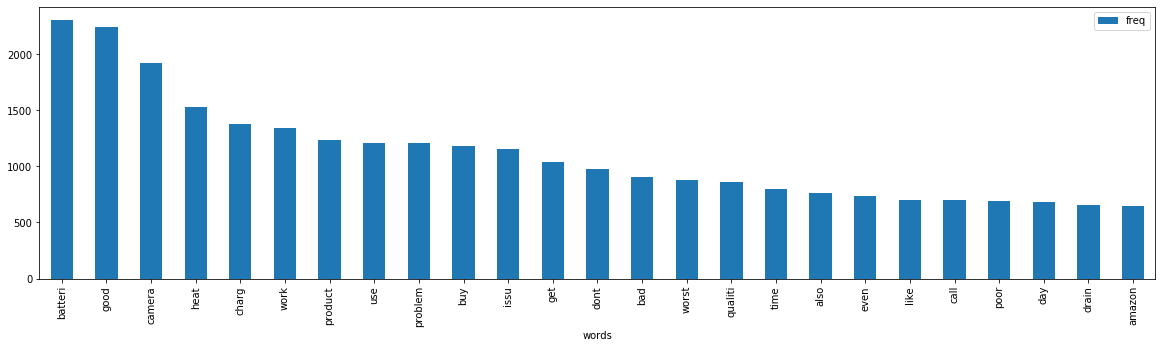

In [64]:
df_dist_neg.sort_values(ascending=False,by='freq').head(25).plot.bar(x='words',y='freq',figsize=(20,5))

In [65]:
all_terms_pos = word_tokenize(reviews_combined_clean_pos)
fdist = FreqDist(all_terms_pos)

In [66]:
df_dist_pos = pd.DataFrame(fdist.items(),columns=['words','freq'])

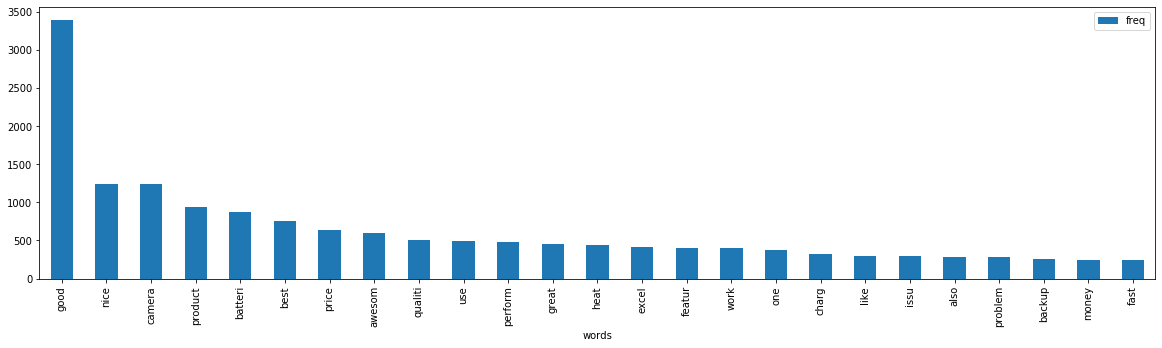

In [67]:
df_dist_pos.sort_values(ascending=False,by='freq').head(25).plot.bar(x='words',y='freq',figsize=(20,5))

### For the top 150 features as bigrams obtain the bar graph of your clean amazon reviews

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect_bg = CountVectorizer(max_features=150,ngram_range=(2,2))

In [69]:
X_bg = count_vect_bg.fit_transform(reviews['clean_review'])

In [70]:
DTM_bg = pd.DataFrame(X_bg.toarray(),columns=count_vect_bg.get_feature_names())

In [71]:
temp_df = DTM_bg.sum().sort_values(ascending=False).reset_index()

In [72]:
temp_df.columns = ['words','freq']

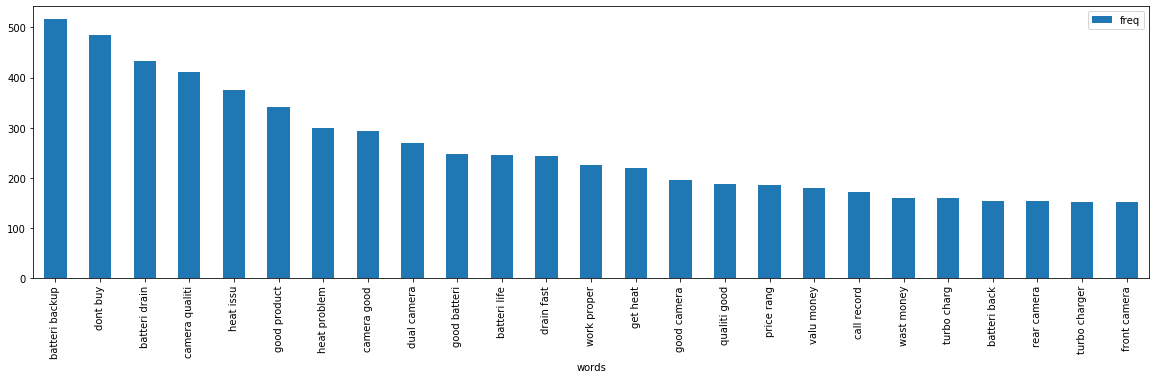

In [73]:
temp_df.sort_values(ascending=False,by='freq').head(25).plot.bar(x='words',y='freq',figsize=(20,5))

**Pain area is battery**

## Trigram

In [74]:
count_vect_tg = CountVectorizer(ngram_range=(3,3),max_features=150)

In [75]:
X_tg = count_vect_tg.fit_transform(reviews['clean_review'])

# creating a DTM
DTM_trigarm = pd.DataFrame(X_tg.toarray(),columns=count_vect_tg.get_feature_names())

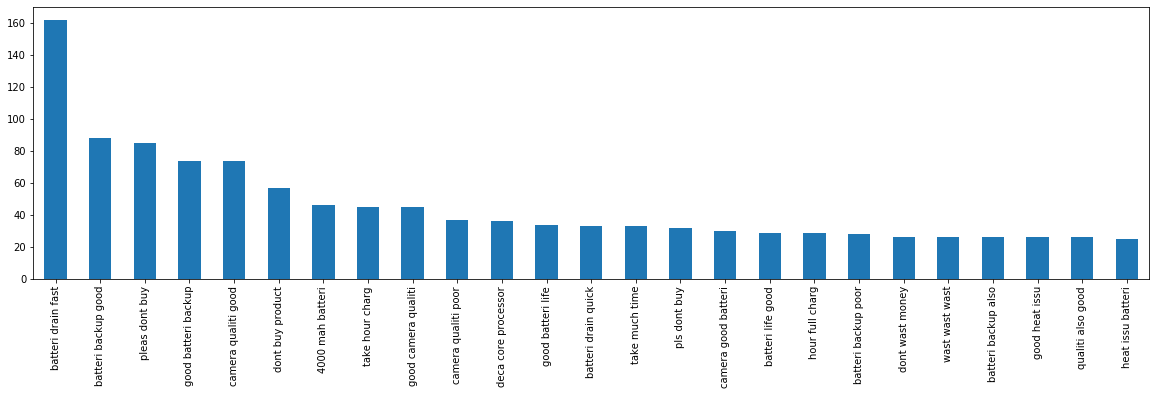

In [76]:
DTM_trigarm.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5))

## TFIDF

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
tfidf_vect =TfidfVectorizer(max_features=150,ngram_range=(2,2))

In [79]:
X_tfidf = tfidf_vect.fit_transform(reviews['clean_review'])
# creating a DTM
DTM_bigram = pd.DataFrame(X_tfidf.toarray(),columns=tfidf_vect.get_feature_names())

## Sentiment Prediction Strategy 1: Building our own model based on the sentiment labels

Applying Supervised learning on labelled text data - In this case we will leverage the sentiment label which is avaliable along with the text data

Steps
 - Step1: get the X and y
 - Step2: converting text to numbers (countvectorizer and tfidfvectorizer)
 - Step3: Split into test and train
 - Step4: train the model
 - Step5: test and get the accuracy scores
 - Step6: Make predictions for an Input Review

In [80]:
X_text = reviews['clean_review'].values
y = reviews['sentiment'].values

In [81]:
# Create a document term matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
count_vect = CountVectorizer(max_features=3500)
X = count_vect.fit_transform(X_text)

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [83]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [84]:
logreg.fit(X_train,y_train)

C:\Users\Karthik\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
y_pred = logreg.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [87]:
accuracy_score(y_test,y_pred)

0.8453151618398637

In [88]:
# Other algorithms
from sklearn.naive_bayes import MultinomialNB

In [89]:
nb_clf = MultinomialNB()

In [90]:
nb_clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [91]:
y_pred = nb_clf.predict(X_test)

In [92]:
accuracy_score(y_test,y_pred)

0.8429301533219762

In [93]:
# Make Predictions (2 new reviews)
review1 = "This is a fantastic mobile really like it but the battery drains fast"
review2 = "Camera is good but when I speak over phone continously over long time it gets heated up"

In [94]:
review = [review1,review2]
review

['This is a fantastic mobile really like it but the battery drains fast',
 'Camera is good but when I speak over phone continously over long time it gets heated up']

In [95]:
c_review = list(map(clean_txt,review))

In [96]:
# only transform coz we had done fit() earlier which had extracted the features
X_text_new = count_vect.transform(c_review) 

In [97]:
y_test_pred_new = logreg.predict(X_text_new)

In [98]:
y_test_pred_new

array([1, 0], dtype=int64)

In [99]:
y_test_pred_new = nb_clf.predict(X_text_new)
y_test_pred_new

array([1, 0], dtype=int64)

## Sentiment Analysis
### AFFIN

In [100]:
affin = pd.read_csv('AFINN-111.txt',sep='\t',header=None)

In [101]:
affin.head()

,0,1
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [102]:
term_scores = dict(affin.values)

In [103]:
list(term_scores.keys())[:10]

['abandon',
 'abandoned',
 'abandons',
 'abducted',
 'abduction',
 'abductions',
 'abhor',
 'abhorred',
 'abhorrent',
 'abhors']

In [104]:
def get_sentiment(sent):
    tokens = word_tokenize(sent.lower())
    score= 0
    for term in tokens:
        score += term_scores.get(term,0)
    return score

In [105]:
reviews['clean_review'].head()

0                               good need updat improv
1    worst bought ever batteri drain like hell back...
2                        get cash back alreadi januari
3                                                 good
4    worst everthey chang last problem still amazon...
Name: clean_review, dtype: object

In [106]:
reviews['sent_score'] = reviews['clean_review'].apply(get_sentiment)

In [107]:
reviews['sent_prediction'] = reviews['sent_score'].apply(lambda x : 1 if x > 0 else 0)

In [108]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction
0,1,Good but need updates and improvements,good need updat improv,3,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari,0,0
3,1,Good,good,3,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7,0


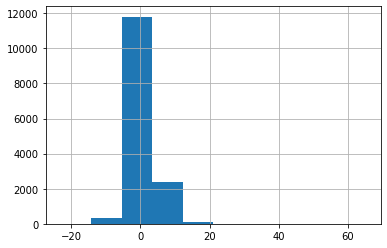

In [109]:
reviews['sent_score'].hist()

In [110]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [111]:
accuracy_score(reviews['sentiment'],reviews['sent_prediction'])

0.7103918228279387

In [112]:
confusion_matrix(reviews['sentiment'],reviews['sent_prediction'])

array([[5147, 2565],
       [1685, 5278]], dtype=int64)

In [113]:
## Checking accuracy without stemming and lemmatization
def clean_txt_new(sent):
    #Stripping white spaces before and after the text
    sent = sent.strip()
    #Replacing multiple spaces with a single space
    result = re.sub('\s+',' ',sent)
    #Replacing the non-alphanumeric and non space chars with nothing
    result1 = re.sub('[^\s\w]+','',result)
    #Normalize case and remove shorter tokens
    tokens = word_tokenize(result1.lower())
    stemmed = [term for term in tokens if term not in stop_updated and len(term)>2]
    #Join all to form a single string which will be returned from the UDF
    res = ' '.join(stemmed)
    return res

In [114]:
reviews['clean_review_new'] = reviews.review.apply(clean_txt_new)

In [115]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,clean_review_new
0,1,Good but need updates and improvements,good need updat improv,3,1,good need updates improvements
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,worst bought ever battery draining like hell b...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari,0,0,get cash back already january
3,1,Good,good,3,1,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7,0,worst everthey changed last problem still amaz...


In [116]:
reviews['sent_score'] = reviews['clean_review_new'].apply(get_sentiment)

In [117]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,clean_review_new
0,1,Good but need updates and improvements,good need updat improv,3,1,good need updates improvements
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,worst bought ever battery draining like hell b...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari,0,0,get cash back already january
3,1,Good,good,3,1,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7,0,worst everthey changed last problem still amaz...


In [118]:
reviews['sent_prediction'] = reviews['sent_score'].apply(lambda x : 1 if x > 2 else 0)

In [119]:
accuracy_score(reviews['sentiment'],reviews['sent_prediction'])

0.7772402044293015

In [120]:
confusion_matrix(reviews['sentiment'],reviews['sent_prediction'])

array([[5931, 1781],
       [1488, 5475]], dtype=int64)

## Vader Scores

In [121]:
## Checking accuracy without stemming and lemmatization
def clean_txt_new(sent):
    #Stripping white spaces before and after the text
    sent = sent.strip()
    #Replacing multiple spaces with a single space
    result = re.sub('\s+',' ',sent)
    #Replacing the non-alphanumeric and non space chars with nothing
    #result1 = re.sub('[^\s\w]+','',result)
    #Normalize case and remove shorter tokens
    tokens = word_tokenize(result)
    #stemmed = [term for term in tokens if term not in stop_updated and len(term)>2]
    #Join all to form a single string which will be returned from the UDF
    res = ' '.join(tokens)
    return res

In [122]:
reviews['clean_review_vader'] = reviews.review.apply(clean_txt_new)

In [123]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,clean_review_new,clean_review_vader
0,1,Good but need updates and improvements,good need updat improv,3,1,good need updates improvements,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,worst bought ever battery draining like hell b...,"Worst mobile i have bought ever , Battery is d..."
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari,0,0,get cash back already january,when I will get my 10 % cash back ... . its al...
3,1,Good,good,3,1,good,Good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7,0,worst everthey changed last problem still amaz...,The worst phone everThey have changed the last...


In [124]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [125]:
analyser = SentimentIntensityAnalyzer()

In [126]:
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [127]:
reviews['sent_score_vader'] = reviews['clean_review_vader'].apply(get_vader_sentiment)

In [128]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,clean_review_new,clean_review_vader,sent_score_vader
0,1,Good but need updates and improvements,good need updat improv,3,1,good need updates improvements,Good but need updates and improvements,0.5994
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,worst bought ever battery draining like hell b...,"Worst mobile i have bought ever , Battery is d...",-0.8720
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari,0,0,get cash back already january,when I will get my 10 % cash back ... . its al...,0.0000
3,1,Good,good,3,1,good,Good,0.4404
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7,0,worst everthey changed last problem still amaz...,The worst phone everThey have changed the last...,-0.8289


In [129]:
reviews['sent_prediction_vader'] = reviews['sent_score_vader'].apply(lambda x:1 if x>0.3 else 0)

In [130]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,clean_review_new,clean_review_vader,sent_score_vader,sent_prediction_vader
0,1,Good but need updates and improvements,good need updat improv,3,1,good need updates improvements,Good but need updates and improvements,0.5994,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,worst bought ever battery draining like hell b...,"Worst mobile i have bought ever , Battery is d...",-0.8720,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari,0,0,get cash back already january,when I will get my 10 % cash back ... . its al...,0.0000,0
3,1,Good,good,3,1,good,Good,0.4404,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7,0,worst everthey changed last problem still amaz...,The worst phone everThey have changed the last...,-0.8289,0


In [131]:
accuracy_score(reviews['sentiment'],reviews['sent_prediction_vader'])

0.8044974446337309

In [132]:
confusion_matrix(reviews['sentiment'],reviews['sent_prediction_vader'])

array([[6302, 1410],
       [1459, 5504]], dtype=int64)

- The predicted scores obtained from vader can be binary values or multi-class values
- These vader predicted scores will henceforth be used as a label to make predictions on unseen data. These vader predicted scores will now be used as labels to train our model instead of the original sentiment scores which we arrived out of the ratings
- By doing so we are **eliminating the biases which exists in the sentiment values obtained from the ratings**

Lets use the vader predicted scores to train our model and make predictions using:
 - Naive Bayes
 - Logistic regression

Steps:
- Step1: Seperate out the X and y
- Step2: Split into test and train
- Step3: converting text to numbers (countvectorizer or tfidfvectorizer)
    - Extract features and transform for train
    - only transform for test
- Step4: train the model
- Step5: test and get the accuracy scores
- Step6: Make predictions for an Input review

In [133]:
X_text = reviews['clean_review'].values
y = reviews['sent_prediction_vader'].values

In [134]:
X_train,X_test,y_train,y_test = train_test_split(X_text,y,test_size=0.2,random_state=42)

In [135]:
# Create a document term matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
count_vect = CountVectorizer(max_features=3500)
#Extract the features which are only going to be used for training
# Applying the transfomration on those extracted features
X_train = count_vect.fit_transform(X_train)
#For the words used for training, apply the transformation on the test set
# If there are new words in the test set, we are just ignoring them
X_test = count_vect.transform(X_test)

In [136]:
print(X_train.shape, X_test.shape)

(11740, 3500) (2935, 3500)


### Logistic Regression

In [137]:
lr_clf = LogisticRegression()

In [138]:
lr_clf.fit(X_train,y_train)

C:\Users\Karthik\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
y_pred = lr_clf.predict(X_test)

In [140]:
accuracy_score(y_test,y_pred)

0.8732538330494037

### Naive Bayes

In [141]:
clf_nb = MultinomialNB()

In [142]:
clf_nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [143]:
y_pred = clf_nb.predict(X_test)

In [144]:
accuracy_score(y_test,y_pred)

0.838160136286201

### Support Vector Classifier

In [145]:
from sklearn.svm import SVC

In [146]:
clf_svc = SVC()

In [147]:
clf_svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [148]:
y_pred = clf_svc.predict(X_test)

In [149]:
accuracy_score(y_test,y_pred)

0.865076660988075

## Document Clustering

## Task

- Identify the right number of clusters for your amazon reviews. Cluster - - the dataset and obtain the Silhouette score
- for every cluster by looking at the cluster centroid get the top 5 words per cluster
- Obtain the word cloud for each of the clusters
- Obtain the avg vader sentiment score(not prediction) for each of the cluster

## Identify the right number of clusters for your amazon reviews. Cluster - - the dataset and obtain the Silhouette score


In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [151]:
tfidf_vect = TfidfVectorizer(max_features=2000)

In [152]:
X = tfidf_vect.fit_transform(X_text)

In [153]:
from sklearn.cluster import KMeans

In [154]:
error_lst = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X.toarray())
    error_lst.append(kmeans.inertia_)

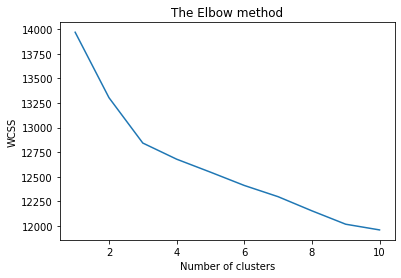

In [155]:
plt.plot(range(1,11),error_lst)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [156]:
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=0)
labels = kmeans.fit_predict(X)

In [157]:
from sklearn.metrics import silhouette_score
silhouette_score(X,labels,random_state=200)

0.0672111649963952

In [158]:
reviews['cluster_predicted'] = labels
reviews['cluster_predicted'].value_counts()

0    9162
3    2790
2    1095
1     742
4     497
5     389
Name: cluster_predicted, dtype: int64

In [159]:
num_clusters = 6

## For every cluster by looking at the cluster centroid get the top 5 words per cluster

In [160]:
print('Top 5 terms per cluster')
order_centroids = kmeans.cluster_centers_.argsort()[:,::-1]
terms = tfidf_vect.get_feature_names()
for i in range(num_clusters):
    print('Cluster %d:' %i),
    for ind in order_centroids[i, :5]:
        print('%s' %terms[ind]),
    print()

Top 5 terms per cluster
Cluster 0:
good
camera
product
awesom
work

Cluster 1:
nice
product
good
one
featur

Cluster 2:
good
product
one
camera
batteri

Cluster 3:
batteri
heat
charg
problem
good

Cluster 4:
best
price
rang
good
camera

Cluster 5:
bad
product
camera
batteri
qualiti



## Obtain the word cloud for each of the clusters


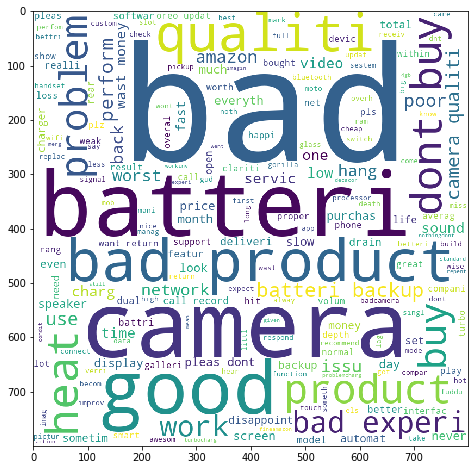

In [161]:
group = reviews[reviews['cluster_predicted'] == 5]
text = ' '.join(group.clean_review)
wc = WordCloud(height=800, width=800, background_color='white').generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.show()

## Obtain the avg vader sentiment score(not prediction) for each of the cluster

In [162]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [163]:
analyser = SentimentIntensityAnalyzer()

In [164]:
def get_sentiment_score(sent):
    return analyser.polarity_scores(sent)['compound']

In [165]:
group['review'].apply(get_sentiment_score).mean() #cluster 5

-0.4821226221079701

In [166]:
group = reviews[reviews['cluster_predicted'] == 0]
group['review'].apply(get_sentiment_score).mean()

0.1315059812268058

In [167]:
group = reviews[reviews['cluster_predicted'] == 1]
group['review'].apply(get_sentiment_score).mean()

0.4712501347708878

In [168]:
group = reviews[reviews['cluster_predicted'] == 2]
group['review'].apply(get_sentiment_score).mean()

0.4008068493150747

In [169]:
group = reviews[reviews['cluster_predicted'] == 3]
group['review'].apply(get_sentiment_score).mean()

-0.07206763440860212

In [170]:
group = reviews[reviews['cluster_predicted'] == 4]
group['review'].apply(get_sentiment_score).mean()

0.6809372233400425

In [171]:
reviews.groupby('cluster_predicted').agg({'sent_score_vader':'mean'}).reset_index().\
rename(columns={'sent_score_vader':'avg_vader_score'}).\
sort_values(by='avg_vader_score',ascending=False)

,cluster_predicted,avg_vader_score
4,4,0.682154
1,1,0.481543
2,2,0.401511
0,0,0.133170
3,3,-0.080361
5,5,-0.484193


## Tasks related to cosine similarity
- Check the cosine similarity with the second and third Amazon reviews
- For the 2nd review of the lenovo k8 get the top 5 similar reviews
- For the review with the most number of words, find its similar reviews
- For the review with the least vader compund score get the top similar reviews
- For each of the top 5 words in the entire cleaned corpus find out the similar words

In [172]:
tfidf_mat = pd.DataFrame(X.toarray(),columns=tfidf_vect.get_feature_names())

In [173]:
# Check the cosine similarity with the second and third Amazon reviews
from sklearn.metrics.pairwise import cosine_similarity

In [174]:
cs = cosine_similarity(tfidf_mat)

In [175]:
cs.shape

(14675, 14675)

In [176]:
sim_df = pd.DataFrame(cs,columns=tfidf_mat.index,index=tfidf_mat.index)

In [177]:
cs[1,2]

0.026509426917072202

In [178]:
# For the 2nd review of the lenovo k8 get the top 5 similar reviews
def get_similar_reviews(input_doc,mat):
    col_vals = mat[input_doc].sort_values(ascending=False)
    simi_words = col_vals.drop(input_doc).head()
    return simi_words

In [179]:
get_similar_reviews(1,sim_df)

6226     0.343534
2222     0.343464
3350     0.342546
8123     0.332966
11162    0.326741
Name: 1, dtype: float64

In [180]:
pd.DataFrame(reviews.review.values[cs[1].argsort()[::-1][1:6]])

,0
0,I don't know about other piecesBut in my mobil...
1,8 hours to get full charge.All other good
2,Battery issue full charge 100% you have used o...
3,Battery issue it will take 5 hour to charge full
4,1. Battery Draining very fast.2. Charging take...


In [181]:
# For the review with the most number of words, find its similar reviews
review_most = reviews['review'].apply(lambda x : len(x.split(' ')))

In [182]:
review_most.sort_values(ascending=False).head(1) #7599 review

7559    722
Name: review, dtype: int64

In [183]:
pd.DataFrame(reviews['review'].values[cs[7559].argsort()[::-1][1:6]])

,0
0,Nice cell phone
1,Super cell phone
2,Cell phone is quite good but I am very disappo...
3,Varry bed cell phone in lenovo
4,This is absolutely amazing cell


In [184]:
get_similar_reviews(7559,sim_df)

1612     0.611244
6192     0.548862
2107     0.491953
14359    0.476673
12783    0.463070
Name: 7559, dtype: float64

In [185]:
reviews.review.loc[1612]

'Nice cell phone'

In [186]:
# For the review with the least vader compund score get the top similar reviews
reviews['sent_score_vader'].sort_values().head(1)

8075   -0.9971
Name: sent_score_vader, dtype: float64

In [187]:
pd.DataFrame(reviews.review.values[cs[8075].argsort()[::-1][1:6]])

,0
0,Waste waste waste waste waste waste waste wast...
1,Waste
2,Paysa waste
3,Wast
4,waste


In [188]:
get_similar_reviews(8075,sim_df)

3054    1.0
6201    1.0
3295    1.0
4917    1.0
4381    1.0
Name: 8075, dtype: float64

In [189]:
# For each of the top 5 words in the entire cleaned corpus find out the similar words
from nltk.probability import FreqDist

In [190]:
combined_cleaned = ' '.join(reviews['clean_review'])

In [191]:
fdist = FreqDist(word_tokenize(combined_cleaned))

In [192]:
top_clean_words = pd.DataFrame(fdist.items(),columns=['words','freq'])
top_clean_words.sort_values(by='freq',ascending=False).head()

,words,freq
0,good,5636
7,batteri,3178
138,camera,3160
110,product,2172
63,heat,1971


In [193]:
top_5 = top_clean_words.sort_values(by='freq',ascending=False).head()['words']

In [194]:
cs_words = cosine_similarity(tfidf_mat.T)
sim_df_words = pd.DataFrame(cs_words,columns=tfidf_vect.get_feature_names(),index=tfidf_vect.get_feature_names())

In [195]:
def get_similar_words(input_word,mat):
    col_vals = mat[input_word].sort_values(ascending=False)
    simi_words = col_vals.drop(input_word).head()
    return simi_words

In [196]:
for word in top_5:
    print('Similar words for',word)
    print(get_similar_words(word,sim_df_words))
    print()

Similar words for good
product    0.189032
camera     0.158571
batteri    0.131106
qualiti    0.106857
perform    0.099975
Name: good, dtype: float64

Similar words for batteri
backup    0.396076
drain     0.335126
life      0.234726
fast      0.202743
charg     0.184051
Name: batteri, dtype: float64

Similar words for camera
qualiti    0.320929
dual       0.249262
front      0.226644
rear       0.186191
batteri    0.164870
Name: camera, dtype: float64

Similar words for product
good      0.189032
nice      0.118982
buy       0.094974
amazon    0.094070
worst     0.092854
Name: product, dtype: float64

Similar words for heat
problem    0.332409
issu       0.298350
charg      0.220318
get        0.192222
much       0.165615
Name: heat, dtype: float64

